**оценка классификатора**


Евгений Борисов esborisov@sevsu.ru

In [1]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt

In [2]:
# генерируем результаты некоторого условного классификатора
s0 = rng.normal(loc=-1.5,size=(75,1)) # скор негативных примеров
s1 = rng.normal(loc=1.5,size=(34,1)) # скор позитивных примеров
s = np.vstack([s0,s1]) # оценка классификатора

y = [0]*len(s0)+[1]*len(s1) # разметка датасета

In [3]:
import pandas as pd
pd.set_option("display.precision", 2)
pd.DataFrame({'class':y,'score':s.flatten(),}).sample(14).convert_dtypes().T

,6,88,66,104,83,52,48,78,92,75,18,32,30,0
class,0,1,0,1,1,0,0,1,1,1,0,0,0,0
score,-1.83,0.29,-1.89,0.6,0.86,-0.95,-2.93,1.03,2.7,2.12,-1.63,-1.32,-1.67,-1.93


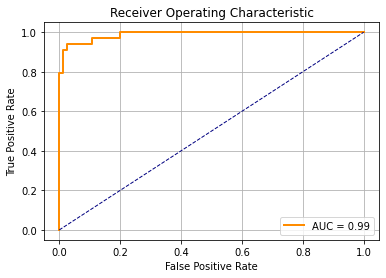

In [4]:
# рисуем ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y, s )
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [5]:
# оптимальный порого скора 
#  максимальное количество True Positive при минимальном количестве False Positive
optimal_threshold = thresholds[ np.argmax( np.abs(tpr-fpr) )  ]
optimal_threshold

0.1296953060664483

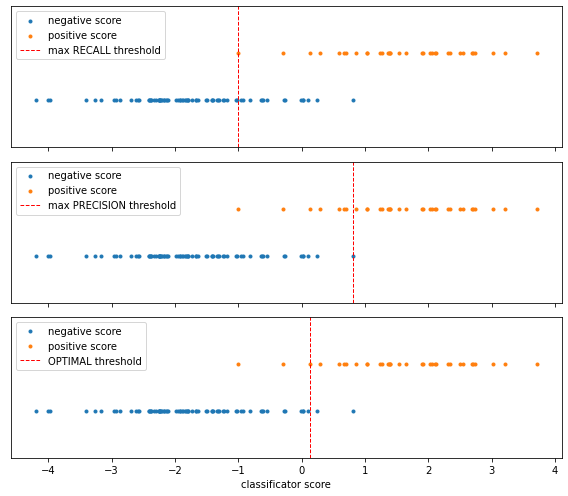

In [6]:
# иллюстрация распределения скоров позитивных и негативных примеров 
# и порогов для определения класса

def plot(ax,s0,s1,b,t):
    n0 = len(s0)
    n1 = len(s1)
    ax.set_ylim(.0,.3)
    ax.set_yticks([])
    ax.scatter(s0,[.1]*n0,marker='.',label='negative score')
    ax.scatter(s1,[.2]*n1,marker='.',label='positive score')
    ax.plot([b,b],[.0,.3],c='r',linestyle='dashed',linewidth=1,label=t+' threshold')
    ax.legend(loc='upper left')

fig,(ax0,ax1,ax2) = plt.subplots(3,1,figsize=(8,7),sharex=True)
plot(ax0,s0,s1,s1.min(),'max RECALL')
plot(ax1,s0,s1,s0.max(),'max PRECISION')
plot(ax2,s0,s1,optimal_threshold,'OPTIMAL')

ax2.set_xlabel('classificator score')
fig.tight_layout()
plt.show()

In [7]:
r = (s>optimal_threshold).astype(int) # результат классификатора

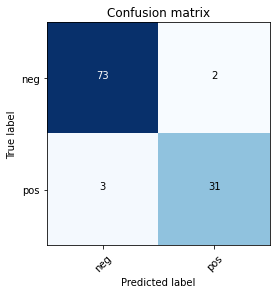

In [8]:
# матрица ошибок

import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,r)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
classes=['neg','pos']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
from sklearn.metrics import classification_report

# таблица метрик качества классификации на тестовом наборе
print( classification_report(y,r) )

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.94      0.91      0.93        34

    accuracy                           0.95       109
   macro avg       0.95      0.94      0.95       109
weighted avg       0.95      0.95      0.95       109

